**Group Members:**

    - Aybüke Çalik
    - Hanyuan Hu
    - Xianjie Dai
    - Heiniger Julia

Text(0.5, 1.0, 'PSD with lengh = 2000')

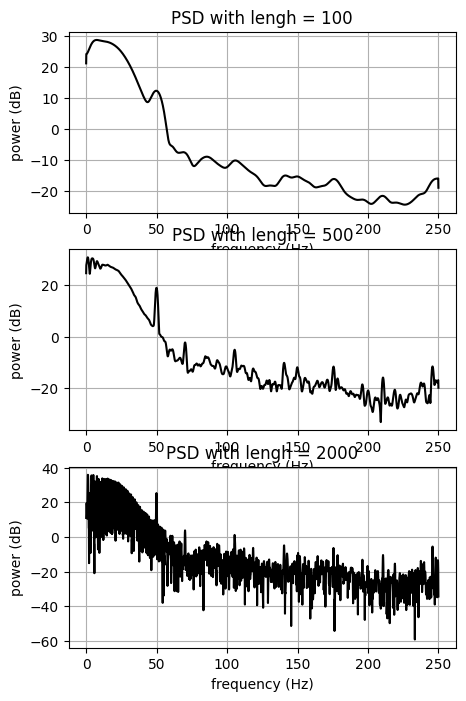

In [1]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp

x = np.genfromtxt('ecg.dat')
fs = 500

"""
    Objective: Compare spectral estimation for different window lengths using
    welch estimation.

    Plot the log spectrum of the signal using windows of 100, 500, 2000.

    Q: Comment the results.
    Q: Which windows length is the most suitable for the observation of 50 Hz?
    Q: Why?
"""

f,X_100 = sp.welch(x, nperseg=100, nfft=4096, fs=fs)
f,X_500 = sp.welch(x, nperseg=500, nfft=4096, fs=fs)
f,X_2000 = sp.welch(x, nperseg=2000, nfft=4096, fs=fs)

py.figure(1, figsize=[5,8])
py.clf()
py.subplot(3,1,1)
py.plot(f, 10*np.log10(X_100), 'k')
py.grid()
py.xlabel('frequency (Hz)')
py.ylabel('power (dB)')
py.title('PSD with lengh = 100')

py.subplot(3,1,2)
py.plot(f, 10*np.log10(X_500), 'k')
py.grid()
py.xlabel('frequency (Hz)')
py.ylabel('power (dB)')
py.title('PSD with lengh = 500')

py.subplot(3,1,3)
py.plot(f, 10*np.log10(X_2000), 'k')
py.grid()
py.xlabel('frequency (Hz)')
py.ylabel('power (dB)')
py.title('PSD with lengh = 2000')

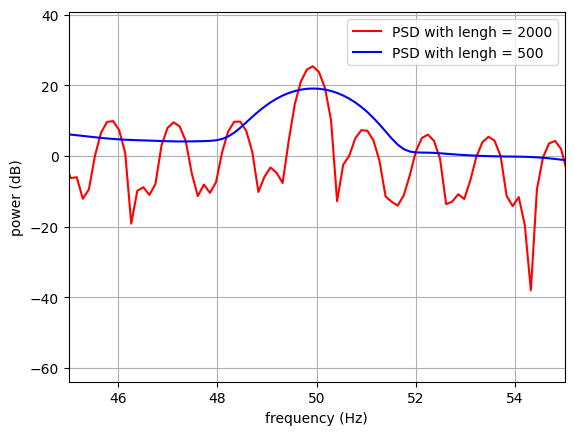

In [2]:
py.plot(f, 10*np.log10(X_2000), 'r', label = "PSD with lengh = 2000")
py.plot(f, 10*np.log10(X_500), 'b', label = "PSD with lengh = 500")
py.grid()
py.xlim([45,55])
py.xlabel('frequency (Hz)')
py.ylabel('power (dB)')
py.legend()

**Q: Comment the results.**

A: The plots display power spectrum densities of an ECG signal using different window lengths. It can be observed that the ECG signal contains large amount of low-frequency components. Moreover, all three results show a peak at 50 Hz. Yet, the results are different in terms of smoothness and resolution.
    
The result with window length of 100 is smoother than the others. As window length increases, the result becomes noisy and makes it difficult to retrieve information. Yet, large window length to an extent can be favorable since it provides finer details in the power spectrum as in the case of window length = 500. In other words, noise in analysis with small window length is averaged out more effectively, i.e. smoother power spectrum, due to large number of segments. However, frequency resolution is low in this case since less data points are used for the FFT of the each segment.
    
**Q: Which windows length is the most suitable for the observation of 50 Hz?**

A: Window length of 500 is the most suitable. 
    
**Q: Why?**

A: Since window length compromises between resolution and smoothness, we have to choose the best parameters so that we could have the best result to analyse. For the first figure, it clearly doesn't have enough resolution and reduction of information takes place. For the last figure, when we zoom in between 45 and 55, we observe clear oscillation indicating that there is too much noise. However, the second figure will give us both the perfect signal lineshape without too much noise as well as reasonable resolution keeping enough information.With a window length of 500,the peak at 50 Hz can be clearly identified thanks to its large power and higher frequency resolution. 

In [3]:
import pylab as py
import numpy as np

def plot_time(x, t, main_title=''):
    py.figure(figsize=[8,8])
    py.subplot(3,1,1)
    py.plot(t,x['rr'],'k')
    py.xlabel('time (s)')
    py.ylabel('interbeats (ms)')
    py.title('cardiac interbeat intervals')
    py.subplot(3,1,2)
    py.plot(t,x['bp'],'k')
    py.xlabel('time (s)')
    py.ylabel('mean blood pressure (mmHg)')
    py.title('mean blood pressure')
    py.subplot(3,1,3)
    py.plot(t,x['resp'],'k')
    py.xlabel('time (s)')
    py.ylabel('respiratory volume (a.u.)')
    py.title('respiratory volume')
    py.suptitle(main_title, fontsize=14)
    
def plot_rxx(x, main_title=''):
    K = np.arange(len(x['rxx_rr']))-len(x['rr'])+1
    py.figure(figsize=[8,8])
    py.subplot(3,1,1)
    py.plot(K,x['rxx_rr'],'k')
    py.xlabel('$k$')
    py.ylabel('power (ms$^2$)')
    py.title('cardiac interbeat intervals')
    py.subplot(3,1,2)
    py.plot(K,x['rxx_bp'],'k')
    py.xlabel('$k$')
    py.ylabel('power (mmHg$^2$)')
    py.title('mean blood pressure')
    py.subplot(3,1,3)
    py.plot(K,x['rxx_resp'],'k')
    py.xlabel('$k$')
    py.ylabel('power (a.u.)')
    py.title('respiratory volume')
    py.suptitle(main_title, fontsize=14)

def plot_X(x, fs, main_title=''):
    f = np.arange(len(x['RR']))/len(x['RR'])*fs
    py.figure(figsize=[8,8])
    py.subplot(3,1,1)
    py.plot(f,x['RR'],'k')
    py.xlabel('f (Hz)')
    py.ylabel('power (ms$^2$/Hz)')
    py.title('cardiac interbeat intervals')
    py.xlim(0,0.5)
    py.subplot(3,1,2)
    py.plot(f,x['BP'],'k')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (mmHg$^2$/Hz)')
    py.title('mean blood pressure')
    py.xlim(0,0.5)
    py.subplot(3,1,3)
    py.plot(f,x['RESP'],'k')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (a.u.)')
    py.title('respiratory volume')
    py.xlim(0,0.5)
    py.suptitle(main_title, fontsize=14)

def plot_XY(x, y, fs, main_title=''):
    f = np.arange(len(x['RR']))/len(x['RR'])*fs
    py.figure(figsize=[8,8])
    py.subplot(3,1,1)
    py.plot(f,x['RR'],'k', label='normal')
    py.plot(f,y['RR'],'r', label='alcool')
    py.xlabel('f (Hz)')
    py.ylabel('power (ms$^2$/Hz)')
    py.title('cardiac interbeat intervals')
    py.xlim(0,0.5)
    py.legend()
    py.subplot(3,1,2)
    py.plot(f,x['BP'],'k', label='normal')
    py.plot(f,y['BP'],'r', label='alcool')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (mmHg$^2$/Hz)')
    py.title('mean blood pressure')
    py.xlim(0,0.5)
    py.legend()
    py.subplot(3,1,3)
    py.plot(f,x['RESP'],'k', label='normal')
    py.plot(f,y['RESP'],'r', label='alcool')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (a.u.)')
    py.title('respiratory volume')
    py.xlim(0,0.5)
    py.legend()
    py.suptitle(main_title, fontsize=14)


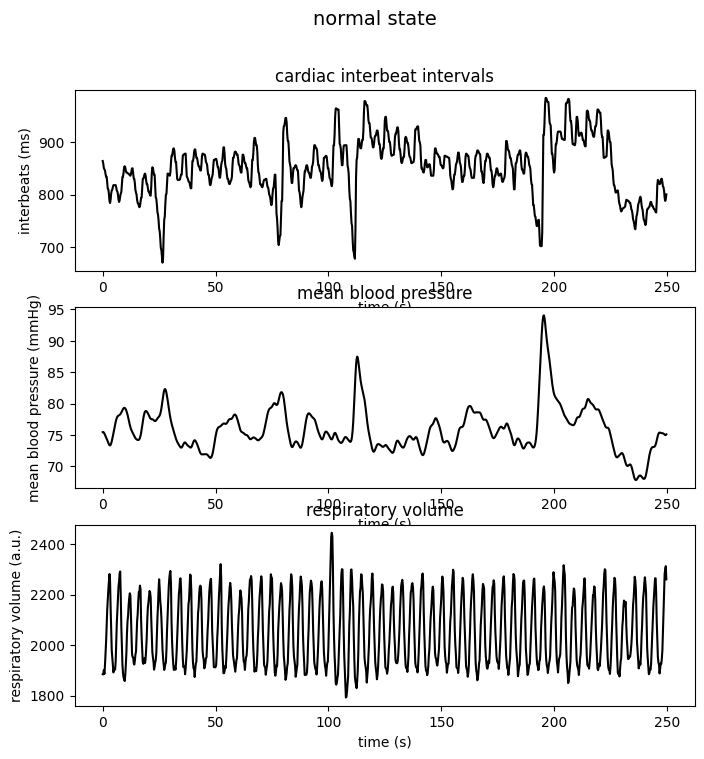

In [4]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp
import m03_ex2_ext as my_plot

# Load signals of a subject at rest.
x = np.genfromtxt('heart_1.dat', delimiter='  ').T
x = {'rr':x[0], 'bp':x[1], 'resp':x[2]}
# Load signals of a subject after alcool consumption.
y = np.genfromtxt('heart_2.dat', delimiter='  ').T
y = {'rr':y[0], 'bp':y[1], 'resp':y[2]}
# Signals are sampled at 4 Hz.
fs = 4
# Generate the time for the recordings.
t = np.arange(len(x['rr']))/fs

"""
    Cardiac interbeats, mean blood pressure and respiration volume of a subject
    at rest.

    Q: Comment the different signals and their realtionships.
    Q: Which signals are related and how?

"""


my_plot.plot_time(x, t, 'normal state')

**Q: Comment the different signals and their realtionships.**

A: The respiratory volume signal (figure 3) is the most deterministic one. It looks like a periodical signal and is composed of more or less regular oscillations. The Cardiac Interbeat Intervals signal shows stochastic characteristics (mix between random and deterministic). The peaks of the signal are approximately equally spaced in time but have different (not regular changing) amplitudes. The interval between two cardiac cycles can differ up to 200ms. The respiratory volume signal is more random than the other two. There are some variations but overall, the signal is steady (+-10mmHg). One can observe, that the cardiac interbeat interval is modulated by respiration. The breathing rate can be found in the signal of the cardiac interbeat signal. At each breath, the cardiac interbeat interval is adapted and changes. This relation cannot be observed between the respiratory volume and the mean blood pressure.  

**Q: Which signals are related and how?**

A: To understand the relationship between the different signals, one has to take into account the baroreflex and the dynamics of cardio-respiratory coupling. Respiratory sinus arrhythmia (RSA) describes the modulation of the heart rate (HR) by respiration: the HR increases during inhalation and decreases during exhalation. So the respiratory volume, which reflects the inhalation and exhalation, modulates the cardiac interbeat intervals (characteristic of the HR). The baroreflex helps to stabilize the blood pressure by a negative feedback loop between the brain and the heart. Baroreceptors at the carotid sinus are activated by high blood pressure and inhibited by low blood pressure. Thereby, increased blood pressure leads to a decrease in HR and vice versa. To conclude, the HR is coupled to the respiratory cycle: the HR increases during inspiration and decreases during expiration. Cardiac output falls, and consequently arterial pressure falls. The drop in arterial pressure reduces stretch on the arterial baroreceptors, causing a reflex increase in heart rate. So, the respiration doesn't directly modulate the blood pressure.  

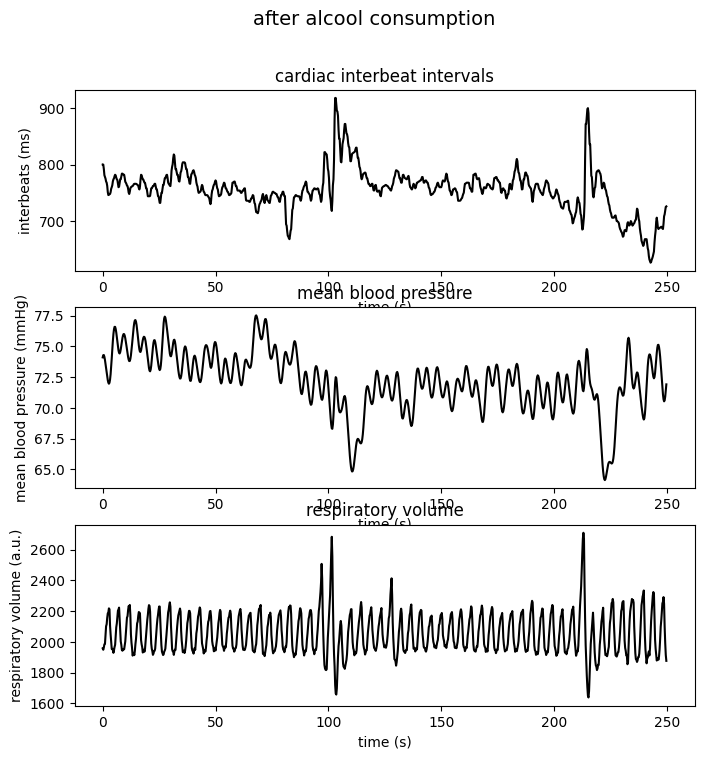

In [5]:
"""
    Cardiac interbeats, mean blood pressure and respiration volume of a subject
    after alcool consumption.

    Q: Comment the different signals and their realtionships.
    Q: Which signals are related and how?
    Q: What are the differences with rest recording of previous figure?

"""

my_plot.plot_time(y, t, 'after alcool consumption')


**Q: Comment the different signals and their realtionships.**

A: We can observe there are irregular behaviours in three signals, mainly caused by the malfunction of the brain after alcool. The respiratory volume signal shows very regular oscillations. Two times, the breathing is deeper (at around 100s and 215s). In fact, the mean blood pressure is very stable (+-5mmHg) but it changes very often/ with a high frequency. Also, the cardiac interbeat intervals signal fluctuates regularly. This time, one can observe the breathing rate much less in the cardiac interbeat interval signal, but it is evident in the mean blood pressure signal. Indicating that the respiratory volume modulates the mean blood pressure directly and not via the cardiac interbeat intervals.  

**Q: Which signals are related and how?**

A: Due to alcohol consumption the baroreflex doesn't work properly so the respiration directly modulates the mean blood pressure. Each respiration cycle is reflected in an oscillation of the mean blood pressure. In addition, the two deep breaths lead to a clear and fast reduction of blood pressure. The Cardiac Interbeat Intervals signal and the Respiratory Volume signal are much less related than before. To conclude, the HR increases during inspiration and decreases during expiration. Cardiac output falls/increases, and consequently, arterial pressure falls/increases. Since the baroreflex doesn't work properly the HR isn't adapting properly. So, respiration directly modulates blood pressure.

**Q: What are the differences with rest recording of previous figure?**

A: There are some deep breaths after alcohol and irregular cardiac interbeat compared with the previous figures. As indicated, the relations of the different signals have changed. The alcohol leads to abnormal brain function/ malfunction of the brain so the baroreflex is restricted. The blood pressure is modulated directly by respiration. That is not favourable since too high/low blood pressure can damage organs. Thus, extreme breathing events can cause health problems. 

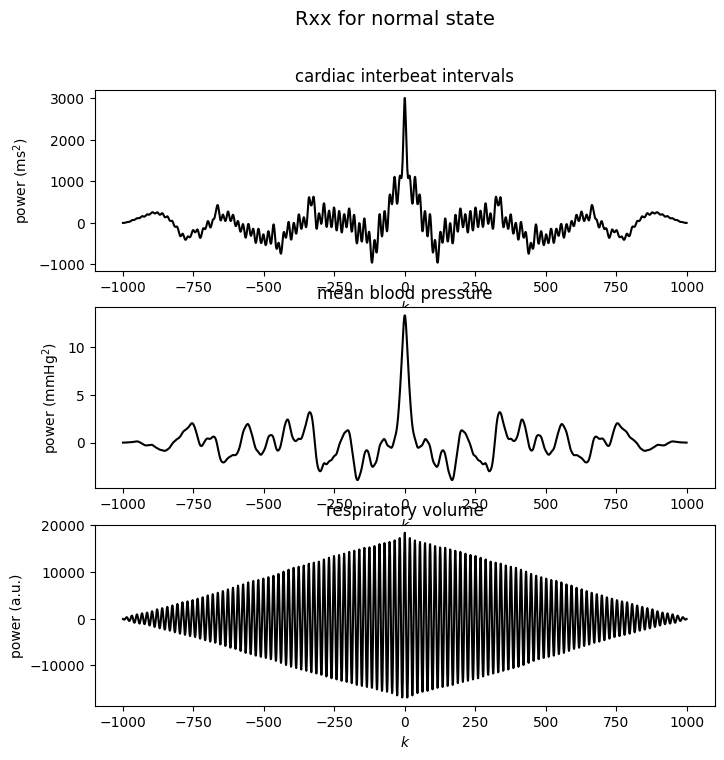

In [6]:

""" 
    Compute the intercorrelation of the signals of the subject at rest.

    Q: Comment the oscillation present in the different signals.
    Q: Which signals are related and how.

"""

def my_corr(x):
    rxx = np.correlate(x-np.mean(x), x-np.mean(x), mode='full')/len(x)
    return rxx

x['rxx_rr'] = my_corr(x['rr'])
x['rxx_bp'] = my_corr(x['bp'])
x['rxx_resp'] = my_corr(x['resp'])

my_plot.plot_rxx(x, 'Rxx for normal state')

**Q: Comment the oscillation present in the different signals.**

A: The oscillations in cardiac interbeat intervals and mean blood pressure are more random-like because they decrease very fast like Gaussian white noise. However, cardiac interbeat intervals signal shows distinct peaks while the mean blood pressure is smoother. The oscillation in respiratory volume decays slower and is more deterministic-like. It shows a repeating pattern.   

**Q: Which signals are related and how.**

A: Cardiac Interbeat Intervals signal and Respiratory Volume signal are related. The two intercorrelations reveal equally distributed peaks, meaning that they have a common signal frequency. While the mean blood pressure signal shows no relation to the respiratory volume signal. This is like expected due to the RSA and the baroreflex system.

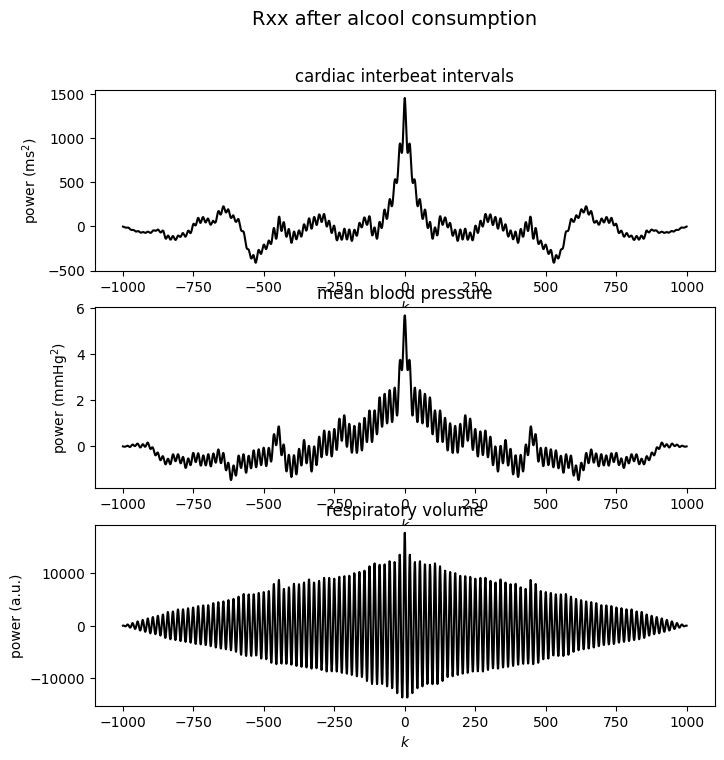

In [7]:
""" 
    Compute the intercorrelation of the signals of the subject after alcool
    consumption.

    Q: Comment the oscillation present in the different signals.
    Q: Which signals are related and how.
    Q: What difference do you observe with the previous figure?

"""

y['rxx_rr'] = my_corr(y['rr'])
y['rxx_bp'] = my_corr(y['bp'])
y['rxx_resp'] = my_corr(y['resp'])

my_plot.plot_rxx(y, 'Rxx after alcool consumption')

**Q: Comment the oscillation present in the different signals.**

A: The oscillation in the first signal is weaker, and the oscillation in the second signal is much stronger, compared with previous figures. Still, both signals show a fast decay. There are some irregular oscillations in the third signal. 

**Q: Which signals are related and how.**

A: This time, the mean blood pressure intercorrelation has the same components as the respiratory volume intercorrelation. Leading to the assumption that they are strongly dependent. The same components are also visible in the cardiac interbeat interval intercorrelation, but less pronounced than before. So the relation is weaker. This is as expected and due to the malfunction of the baroreflex.

**Q: What difference do you observe with the previous figure?**

A:  The oscillation in the first signal is weaker, and the oscillation in the second signal is stronger, compared with previous figures. The components of the respiratory volume intercorrelation are now clearly visible in the blood pressure intercorrelation and less visible in the cardiac interbeat interval intercorrelation. There are some irregular oscillations in the third signal.  Also, the oscillation in the second signal decays slower after alcohol and is more deterministic-like than that before alcohol. 

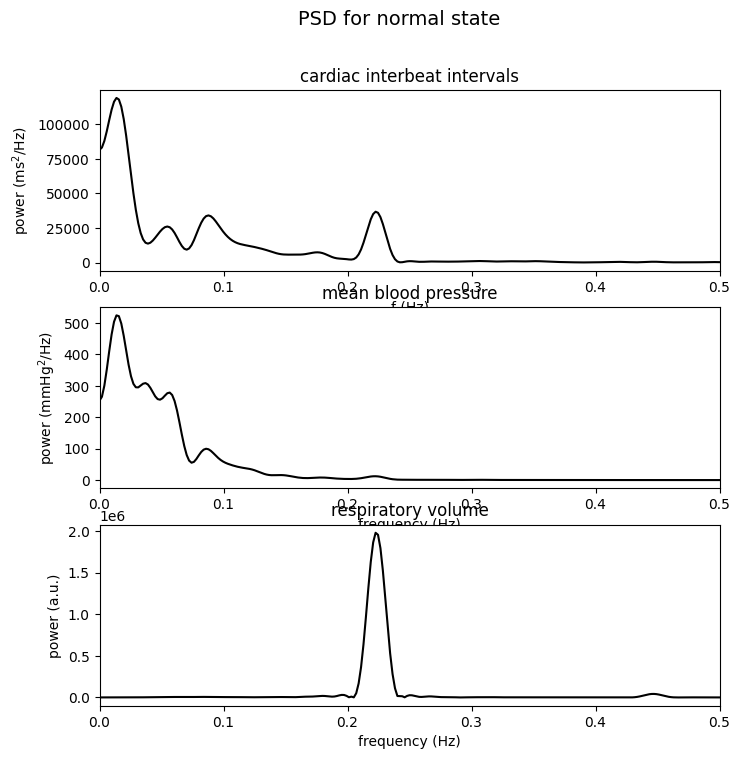

In [8]:
""" 
    Compute the PSD of the signal for the subject at rest.

    Q: How the different peaks are related to the control of the autonomic
        nervous system?
    Q: Do the positions and amplitude of the peaks confirm you previous
        findings;

"""

def my_psd(x, half_win=250):
    interval = np.arange(-half_win,half_win+1)+len(x)//2
    x_sub = x[interval]
    psd = np.abs(np.fft.fft(sp.hann(len(interval))*x_sub, 2048))
    return psd

x['RR'] = my_psd(x['rxx_rr'])
x['BP'] = my_psd(x['rxx_bp'])
x['RESP'] = my_psd(x['rxx_resp'])

my_plot.plot_X(x, fs, 'PSD for normal state')



Q: How the different peaks are related to the control of the autonomic nervous system?
A: The peak above 0.2Hz is related to the RSA which involves respiration and HR. The low-frequency band (0.05 - 0.1Hz) is caused by the baroreflex regulation that influences the HR to stabilize the blood pressure. 

Q: Do the positions and amplitude of the peaks confirm you previous findings;  
A: Yes. The PSD of the respiratory volume signal has only one cleary peak at ~0.2Hz related to the RSA. Since RSA is dependent on breathing, 0.2Hz is reasonable. This corresponds to one respiratory cycle each 5sec. This peak is also found in the cardiac interbeat intervals signal, reinforcing the mentioned relationship between HR and respiration through the RSA. However, also the baroreflex can modulate the cardiac interbeat intervals. This low-frequency band is also found in the mean blood pressure PSD while the 0.2Hz peak is almost not visible. This confirms the previous findings, that the mean blood pressure is not directly modulated by respiration.   

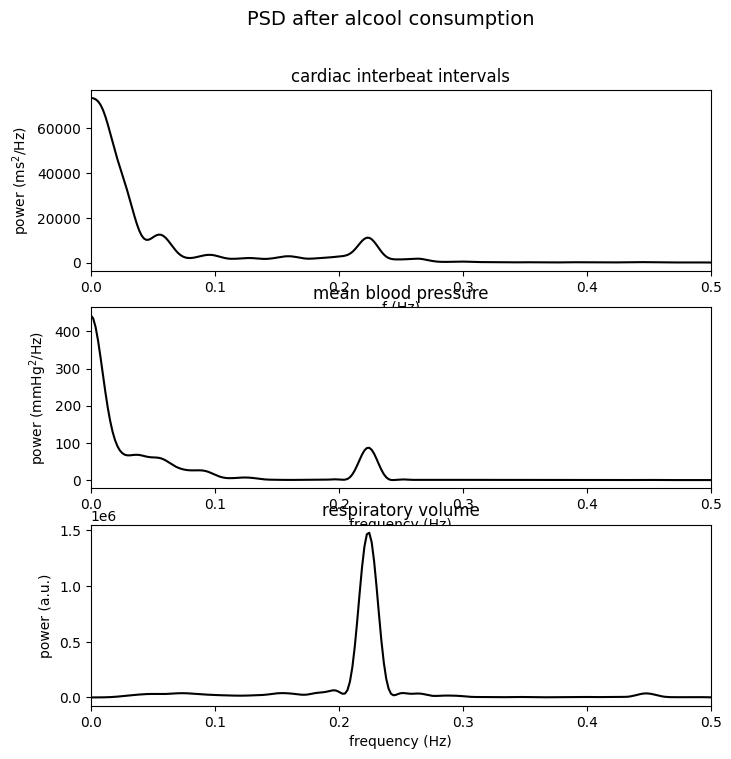

In [9]:
""" 
    Compute the PSD of the signal for the subject after alcool consumption.

    Q: How the different peaks are related to the control of the autonomic
        nervous system?
    Q: Do the positions and amplitude of the peaks confirm you previous
        findings;

"""

y['RR'] = my_psd(y['rxx_rr'])
y['BP'] = my_psd(y['rxx_bp'])
y['RESP'] = my_psd(y['rxx_resp'])

my_plot.plot_X(y, fs, 'PSD after alcool consumption')



**Q: How the different peaks are related to the control of the autonomic nervous system?**

A: As before, the peak above 0.2Hz is related to the RSA which involves respiration and HR. The low-frequency band (0.05 - 0.1Hz) is caused by the baroreflex regulation that influences the HR to stabilize the blood pressure. 

**Q: Do the positions and amplitude of the peaks confirm you previous findings;**

A: Yes. The previous findings are confirmed by the PSDs. The baroreflex does not work after alcohol consumption. Instead, the mean blood pressure is directly influenced by respiration (PSD of mean blood pressure contains the peak at 0.2Hz but no real low-frequency band is visible).  

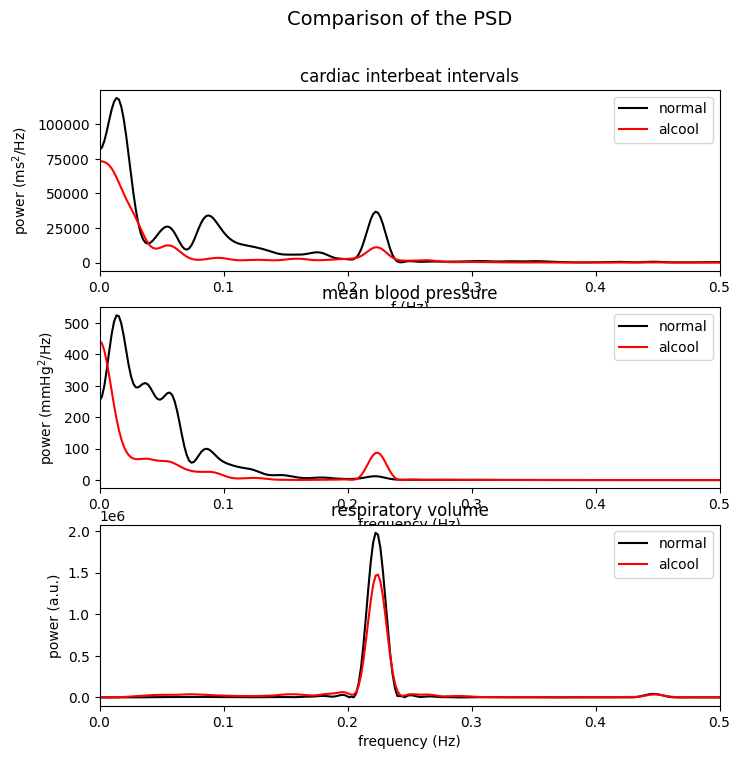

In [10]:
"""
    Plot the PSDs of the signals for the two conditions.

    Q: Discuss the differences.

"""

my_plot.plot_XY(x, y, fs, 'Comparison of the PSD')

**Q: Discuss the differences.**  

A: The amplititude of baroreflex regulation in the low frequency is much lower after alcool. The amplitudes of sinus arrhythmia in the high frequency are also lower in the respiratory volume signal and cardiac interbeat intervals signal. As a result, we can see mean blood pressure is dominated by the sinus arrhythmia and has an increasing of amplitude  in the high frequency band. Alcohol consumption leads to a decreased function of the baroreflex (frequency band 0.05-0.1Hz) such that the blood pressure is directly related to respiration and the RSA (peak at 0.2Hz).   

(210.0, 215.0)

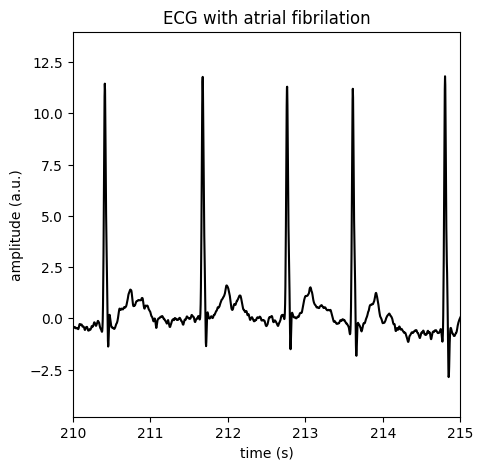

In [11]:
import numpy as np
import pylab as py
py.ion()
py.close('all')
import scipy.signal as sp

"""
    The first signal is an ECG with atrial fibrilation.

    Q: What are the differences of this ECG with a normal ECG?

"""

ecg = np.genfromtxt('ecg_af.dat')
ecg_fs = 300
t_ecg = np.arange(len(ecg))/ecg_fs

py.figure(1,figsize=[5,5])
py.plot(t_ecg, ecg, 'k')
py.xlabel('time (s)')
py.ylabel('amplitude (a.u.)')
py.title('ECG with atrial fibrilation')
py.xlim(210, 215)

**Q: What are the differences of this ECG with a normal ECG?**

A: Compared with a normal ECG, there are no clear signs of P peaks. Instead one can observe irregular oscillations.


In [ ]:
"""
    We compute the autocorelation of the ECG signal.

    In order to dircard the modulation of the baseline we first apply a
    high-pass filter with a cut-off frequency of 0.5 Hz.

    Q: Do you see a specific pattern that permits to characterize the atrial
        fibrilation?

"""

b, a = sp.butter(2, 0.5/ecg_fs*2, btype='high')

ecg_hp = sp.filtfilt(b, a, ecg)

rxx_ecg = np.correlate(ecg_hp, ecg_hp, mode='full') 
k = np.arange(len(rxx_ecg))-len(rxx_ecg)//2

py.figure(2,figsize=[5,5])
py.plot(k, rxx_ecg, 'k')
py.xlabel('$k$')
py.ylabel('amplitude (a.u.)')
py.title('$R_{xx}$ of ECG with atrial fibrilation')
py.xlim(-500, 500)

**Q: Do you see a specific pattern that permits to characterize the atrial
        fibrilation?**
        
A: Normally, the autocorrelation function for ECG has more peaks equally distributing along side the center peak due to the reason that hearts pumps regularly which will give us peaks in different frequency. However, what we observe in this figure shows that there is only noise apart from the center peak indicating that the ECG signal is less regular. Therefore, we could use the peak of autocorrelation function to characterize whether a ECG signal is normal or not

In [ ]:

"""
    Compute the PSD of the ECG signal.

    Q: What do you see?

"""

f, ECG = sp.welch(ecg_hp, nperseg=500, nfft=4096, noverlap=250, fs=ecg_fs)

py.figure(3, figsize=[5,5])
py.clf()
py.plot(f, ECG, 'k')
py.xlabel('frequency (Hz)')
py.ylabel('power (a.u.)')
py.xlim(0,60)


**Q: What do you see?**  

A: The PSD shows several peaks in the frequency band between 4-10Hz, corresponding to time intervals of 0.1-0.25sec. Most of the power is explaind by frequencies up to 20Hz.

In [ ]:

"""
    In order to higlight the signal related to the repolarisation of the
    atria and ECG signal with atrial fibrilation has been process, keeping only
    the P wave (repolarisation of the atria) and the QRST waves have been
    removed.

    During the measurement 4 time segments exhibit different behaviors.

    Q: What are the difference between the different segments ?

"""

p_wave = np.genfromtxt('AF_sync.dat')
p_wave_fs = 50
t_p_wave = np.arange(len(p_wave))/p_wave_fs

segments = [1500, 2000, 2500, 3000, 3500]


py.figure(4,figsize=[10,10])
for n in range(len(segments)-1):
    py.subplot(2, 2, int(n+1))
    idx = np.arange(segments[n], segments[n+1])
    py.plot(t_p_wave[idx], p_wave[idx], 'k')
    py.xlabel('time (s)')
    py.ylabel('amplitude (a.u.)')
    py.title('p_waves for segment '+str(n+1))

**Q: What are the difference between the different segments ?**

A: Segment 4 seems to be the noisiest one. The peaks have different amplitudes and are not even distributed over time. There are a lot of small fluctuations. Segments 1 and 2 are more periodic but have still differences in amplitude. Segment 3 reveals the most regular pattern. The oscillations are very constant.

In [ ]:
"""
    We compute the autocorelation of the p_wave signal.

    In order to dircard the modulation of the baseline we first apply a
    high-pass filter with a cut-off frequency of 0.5 Hz.
    

    Q: Do you see a specific pattern that permits to characterize the atrial
        fibrilation?
    Q: Discuss the organisation of the signals. Which one is the more organised,
        which one is closer to a noise?

"""



py.figure(5,figsize=[10,10])
for n in range(len(segments)-1):
    py.subplot(2, 2, int(n+1))
    idx = np.arange(segments[n], segments[n+1])
    rxx_p_wave = np.correlate(p_wave[idx], p_wave[idx], mode='full') 
    rxx_p_wave /= np.correlate(np.ones(len(idx)), np.ones(len(idx)), mode='full')
    k = np.arange(len(rxx_p_wave))-len(rxx_p_wave)//2
    py.plot(k, rxx_p_wave, 'k')
    py.xlabel('$k$')
    py.ylabel('amplitude (a.u.)')
    py.title('$R_{xx}$ for p_waves for segment '+str(n+1))

**Q: Do you see a specific pattern that permits to characterize the atrial
        fibrilation?**
        
A: There are two types of AF that can be observed. Segment 1 - 3 shows rythmical and oscillating fibrillations. Which are produced by self excitation-loops in the atrium. Segment 4 shows a very noisy pattern that results from random-like fibrillations which have no oscillating property.          

**Q: Discuss the organisation of the signals. Which one is the more organised,
        which one is closer to a noise?**
        
A: Segment 4 is very noisy and has therfore a faster decay than other segments. While segment 1 and 2 show signal with stable frequency and less amplitude decay. And segment 3 also shows signal with stable frequency but the amplitude decays faster. In addition, segment 1 shows some noise.

In [ ]:
"""
    Compute the PSD of the p_wave signal.

    Q: What do you see?
    Q: Which one is the more organised?
    Q: Which ones looks like a noise?
    Q: Which ones exhibit a sustained repolarisation loop?

"""


py.figure(7, figsize=[10,10])
for n in range(len(segments)-1):
    idx = np.arange(segments[n], segments[n+1])
    f, P_WAVE = sp.welch(p_wave[idx], nperseg=250, nfft=4096, noverlap=100, fs=p_wave_fs)
    py.subplot(2, 2, int(n+1))
    py.plot(f, P_WAVE, 'k')
    py.xlabel('frequency (Hz)')
    py.ylabel('power (a.u.)')
    py.xlim(0,25)
    py.title('PSD for p_waves for segment '+str(n+1))

**Q: What do you see?**

A: The PSD of segments 2 and 3 shows very clear and distinct peaks around 2.5Hz, 5Hz, 7.5Hz, 10Hz and 12.5Hz. These peaks are also visible in segment 1. However, some of the peaks are broader and show some noisy behaviour. Segment 1 is very noisy and has different peaks/ fluctuations between 0-15Hz.

**Q: Which one is the more organised?   Q: Which ones looks like a noise?**

A: Segment 1 seems to be the most organised one. Segment 2 have already some very small fluctuations between the prominent peaks. The less clear peaks in segment 1 indicate some noise while segment 4 is very noisy and shows very little organisation.

**Q: Which ones exhibit a sustained repolarisation loop?**  
A: Sustained repolarisation loops lead to regular oscillating signals with proper frequency. So that, these frequencies would be represented in the PSD. Therefore, at least segment 2 and 3 indicates such loops. Also, segment 1 could contain signals from repolarisation loops. But some noise is present. Probably due to the interaction between the loops. Surely, segment 4 exhibits more random-like FA.